In [6]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from random import *
sns.set_style('darkgrid')

In [7]:
image_resolution = 800

In [8]:
def extract_hist(filename, type, test_type='[TEST]'):
    def avg(a, b):
        n = len(a)
        for i in range(n): 
            if int(b[i]) == 0: a[i] = 0
            else: a[i] = a[i]/b[i]
    tr, test = [], []
    with open(filename, 'r') as file:
        for line in file:
            extract, extract_t = None, None
            no, reward = None, None
            for word in line.split():
                if word == '[TRAIN]':
                    extract = 1 
                if word == test_type:
                    extract_t = 1
                if extract == 1 or extract_t == 1:
                    if word[0] == 'N':
                        no = int(word[3:-1])
                    if word[0] == 'R':
                        reward = float(word[7:-1])
            if extract == 1: tr.append([no, reward])
            elif extract_t == 1: test.append([no, reward])
        tr_bin, test_bin = [0 for i in range(10)], \
                           [0 for i in range(10)]
        cnt_tr_bin, cnt_test_bin = [0 for i in range(10)], \
                           [0 for i in range(10)]
        if type == 1: # 1 digit.
            x_bin = [x for x in range(0, 10, 1)]
            for x in tr:
                if x[0] > 9: continue
                indx = int(x[0])
                tr_bin[indx] += x[1]
                cnt_tr_bin[indx] += 1
            for x in test:
                if x[0] > 9: continue 
                indx = int(x[0])
                test_bin[indx] += x[1]
                cnt_test_bin[indx] += 1
            avg(tr_bin, cnt_tr_bin)
            avg(test_bin, cnt_test_bin)
            return x_bin, tr_bin, test_bin 
        if type == 2: # 2 digit.
            x_bin = [x for x in range(0, 100, 10)]
            for x in tr:
                if x[0] > 99: continue
                indx = int(x[0]//10)
                tr_bin[indx] += x[1]
                cnt_tr_bin[indx] += 1
            for x in test:
                if x[0] > 99: continue 
                indx = int(x[0]//10)
                test_bin[indx] += x[1]
                cnt_test_bin[indx] += 1
            avg(tr_bin, cnt_tr_bin)
            avg(test_bin, cnt_test_bin)
            return x_bin, tr_bin, test_bin 
        if type == 3: # 3 digit.
            x_bin = [x for x in range(0, 1000, 100)]
            for x in tr:
                if x[0] > 999: continue
                indx = int(x[0]//100)
                tr_bin[indx] += x[1]
                cnt_tr_bin[indx] += 1
            for x in test:
                if x[0] > 999: continue 
                indx = int(x[0]//100)
                test_bin[indx] += x[1]
                cnt_test_bin[indx] += 1
            avg(tr_bin, cnt_tr_bin)
            avg(test_bin, cnt_test_bin)
            return x_bin, tr_bin, test_bin

## 3digit barplot

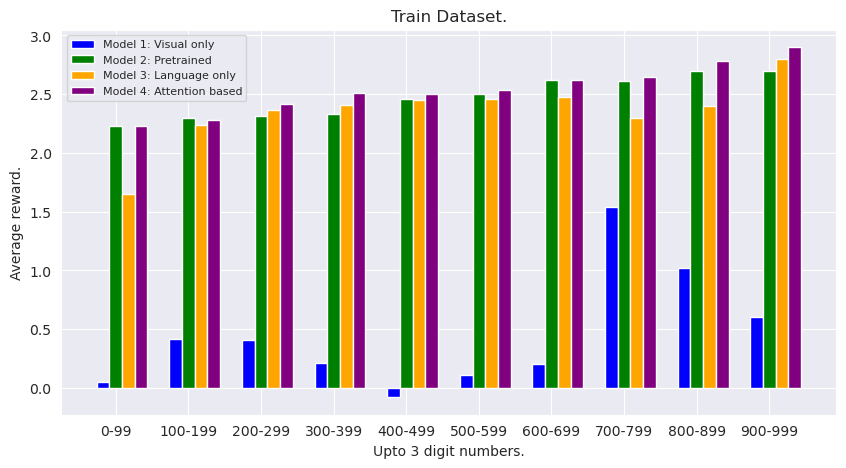

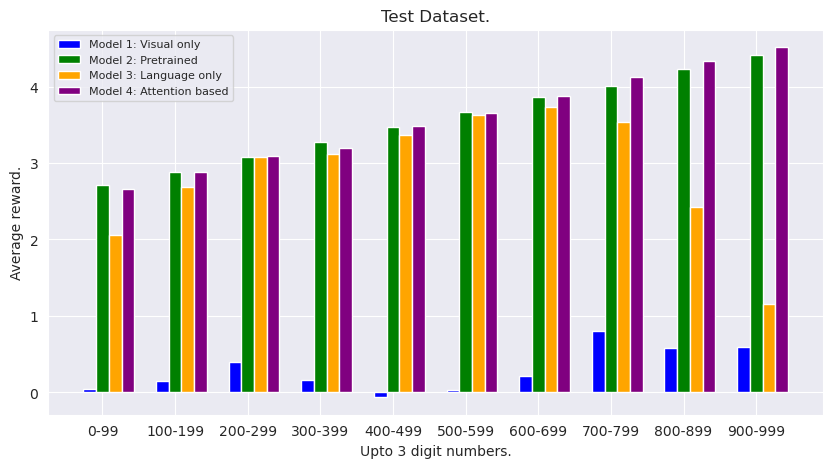

'\nSum of digits determine the reward.\nGenerally train set has more examples so on average bigger numbers\nhave more reward; test set has less examples for example building \n25 instead of 35 will give more reward.\n'

In [9]:
bar_width = 17.5
prefix = "3_Digit_Bar_Plot/"
''' 
Train.
'''
plt.figure(figsize=(10,5))
# CNN only
x_bin1, ytr1, ytest1 = extract_hist(f"{prefix}console_output_digit3_0", 3, test_type="[FULLTEST]")
ytr1_ = [x if idx < 4 else 0 for idx, x in enumerate(ytr1)]
plt.bar(np.array(x_bin1), ytr1, bar_width, color="blue", label = "Model 1: Visual only")
# CNN_NLP_Policy Instr
x_bin2, ytr2, ytest2 = extract_hist(f"{prefix}console_output_digit3_1", 3, test_type="[FULLTEST]")
plt.bar(np.array(x_bin2) + bar_width, ytr2, bar_width, color="green", label = "Model 2: Pretrained")
# Simple NLP only
x_bin3, ytr3, ytest3 = extract_hist(f"{prefix}console_output_digit3_2", 3, test_type="[FULLTEST]")
plt.bar(np.array(x_bin3) + 2*bar_width, ytr3, bar_width, color="orange", label = "Model 3: Language only")
# GPT
x_bin4, ytr4, ytest4 = extract_hist(f"{prefix}console_output_digit3_3", 3, test_type="[FULLTEST]")
ytr4_ = [x if idx < 4 else 0 for idx, x in enumerate(ytr4)]
plt.bar(np.array(x_bin4) + 3*bar_width, ytr4, bar_width, color="purple", label = "Model 4: Attention based")
plt.xticks(np.array(x_bin1) + bar_width , ("0-99", "100-199", "200-299", "300-399", "400-499", "500-599",
                                               "600-699", "700-799", "800-899", "900-999"))

plt.legend(loc="upper left", fontsize=8)
plt.xlabel("Upto 3 digit numbers.")
plt.ylabel("Average reward.")
plt.title("Train Dataset.")
plt.savefig(f'{prefix}3DigitPolicyTrain.png', dpi=image_resolution)
plt.show()

''' 
Test.
'''
plt.figure(figsize=(10,5))
# CNN only
plt.bar(np.array(x_bin1), ytest1, bar_width, color="blue", label = "Model 1: Visual only")
# CNN_NLP_Policy Instr
plt.bar(np.array(x_bin2) + bar_width, ytest2, bar_width, color="green", label = "Model 2: Pretrained")
# Simple NLP only
plt.bar(np.array(x_bin3) + 2*bar_width, ytest3, bar_width, color="orange", label = "Model 3: Language only")
# GPT
plt.bar(np.array(x_bin4) + 3*bar_width, ytest4, bar_width, color="purple", label = "Model 4: Attention based")

plt.xticks(np.array(x_bin1) + bar_width , ("0-99", "100-199", "200-299", "300-399", "400-499", "500-599",
                                          "600-699", "700-799", "800-899", "900-999"))
plt.legend(loc = "upper left", fontsize=8)
plt.xlabel("Upto 3 digit numbers.")
plt.ylabel("Average reward.")
plt.title("Test Dataset.")
plt.savefig(f'{prefix}3DigitPolicyTest.png', dpi=image_resolution)
plt.show()

'''
Sum of digits determine the reward.
Generally train set has more examples so on average bigger numbers
have more reward; test set has less examples for example building 
25 instead of 35 will give more reward.
'''

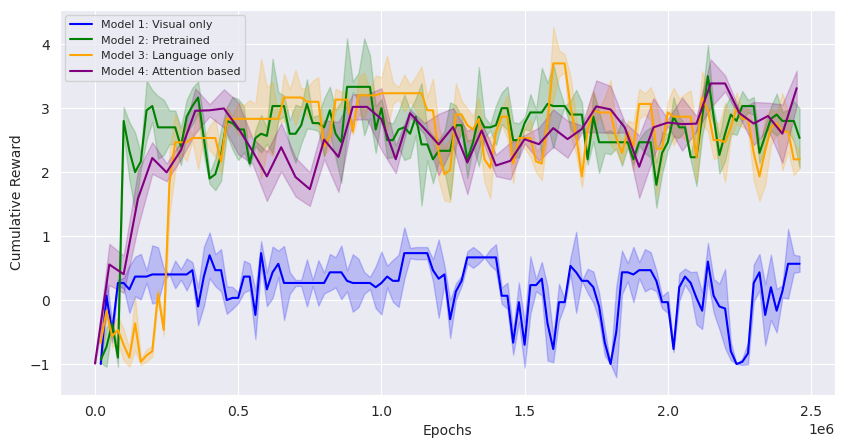

In [10]:
import ast 
import math
import numpy as np
np.random.seed(2018)

prefix = "Train/"
mu, sigma = 0, 0.1
plt.figure(figsize=(10,5))
N_MODELS = 4
############## MODEL 0, 1, 2, 3############## 
label_arr = ["Model 1: Visual only", "Model 2: Pretrained", "Model 3: Language only"]
color_arr = ["blue","green","orange"]
suffix_arr = ["", "_seed1", "_seed2"]
for i in range(N_MODELS-1): # First three models.
    y, x = [], []
    for j in range(len(suffix_arr)):
        with open(f"{prefix}train_model{i}_d3.txt{suffix_arr[j]}", "r") as file:
            content = file.read()
            my_list = ast.literal_eval(content)
            n = len(my_list)
            y.append([ my_list[i][1] for i in range(n) ])
            x.append([ my_list[i][0] for i in range(n) ])
    xn, y_mean, y_std = [], [], [] # store mean, std.
    lb, avgMx_mean, length, avgR_prev = 0, 0, 20, None 
    smooth_factor = 0.75
    y_sz = len(y) # no of seeds.
    while lb + length < n: 
        avgR_arr = []
        for y_indx in range(y_sz):
            value = y[y_indx][lb]
            avgR_arr.append(value)
        avgR = sum(avgR_arr)/y_sz
        avg_std = math.sqrt(sum([(x-avgR)**2 for x in avgR_arr])/y_sz)
        avgMx_mean = avgR_prev if avgR_prev and avgR_prev - avgR > smooth_factor else avgR
        avgR_prev = avgMx_mean
        xn.append(x[0][lb + length])
        y_mean.append(avgMx_mean) 
        y_std.append(avg_std)
        lb += length
    plt.plot(xn, y_mean, linestyle = '-', label = f'{label_arr[i]}', color = f'{color_arr[i]}')
    plt.fill_between(xn, (np.array(y_mean)-np.array(y_std)), \
                         (np.array(y_mean)+np.array(y_std)),\
                         alpha=.2, color = f'{color_arr[i]}')

############## MODEL 3 ##############
y, x = [], []
for j in range(len(suffix_arr)):
    with open(f"{prefix}train_model3_d3.txt{suffix_arr[j]}", "r") as file:
        content = file.read()
        my_list = ast.literal_eval(content)
        n = len(my_list)
        y.append([ my_list[i][1] for i in range(n) ])
        x.append([ my_list[i][0] for i in range(n) ])
xn, y_mean, y_std = [], [], [] # store mean, std.
lb, avgMx_mean, avgR_prev = 0, 0, None # length because data is already sparse.
y_sz = len(y) # no of seeds.
while lb < n: 
    avgR_arr = []
    for y_indx in range(y_sz):
        value = y[y_indx][lb]
        avgR_arr.append(value)
    avgR = sum(avgR_arr)/y_sz
    avg_std = math.sqrt(sum([(x-avgR)**2 for x in avgR_arr])/y_sz)
    avgMx_mean = avgR_prev if avgR_prev and avgR_prev - avgR > smooth_factor else avgR
    avgR_prev = avgMx_mean
    xn.append(x[0][lb])
    y_mean.append(avgMx_mean) 
    y_std.append(avg_std)
    lb += 1
plt.plot(xn, y_mean, linestyle = '-', label = f'Model 4: Attention based', color = f'purple')
plt.fill_between(xn, (np.array(y_mean)-np.array(y_std)), \
                     (np.array(y_mean)+np.array(y_std)),\
                      alpha=.2, color = f'purple')

plt.xlabel('Epochs')
plt.ylabel('Cumulative Reward')
plt.legend(loc = 'upper left', fontsize = 8)
plt.savefig(f'{prefix}TrInstr0.png', dpi = image_resolution)
plt.show()

### State Instr.

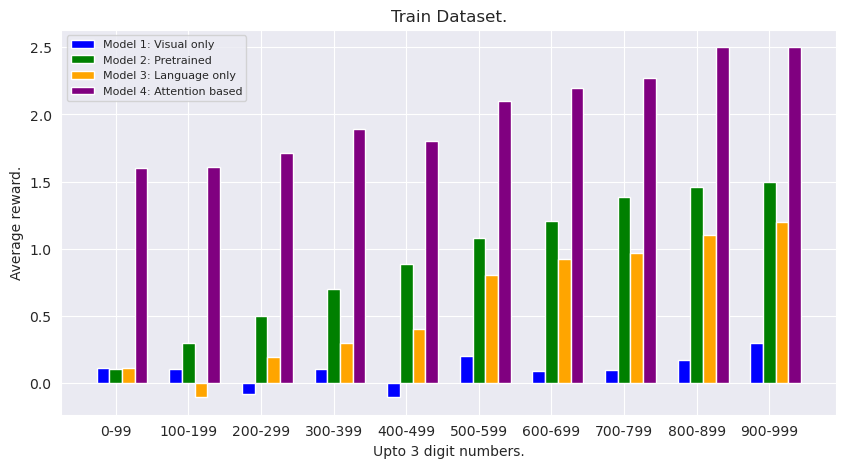

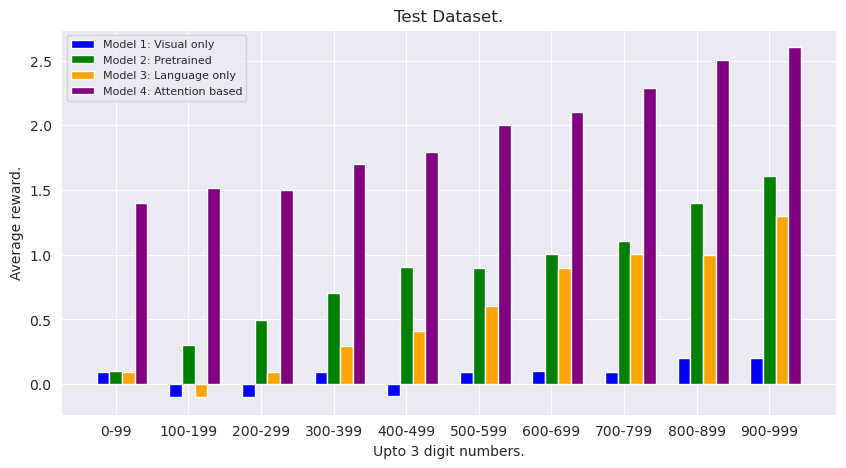

In [11]:
bar_width = 17.5
prefix = "3_Digit_Bar_Plot_State/"
''' 
Train.
'''
plt.figure(figsize=(10,5))
# CNN only
x_bin1, ytr1, ytest1 = extract_hist(f"{prefix}console_output_digit3_0_sr", 3, test_type="[FULLTEST]")
ytr1_ = [x if idx < 4 else 0 for idx, x in enumerate(ytr1)]
plt.bar(np.array(x_bin1), ytr1, bar_width, color="blue", label = "Model 1: Visual only")
# CNN_NLP_Policy Instr
x_bin2, ytr2, ytest2 = extract_hist(f"{prefix}console_output_digit3_1_sr", 3, test_type="[FULLTEST]")
ytr2_ = [x if idx < 4 else 0 for idx, x in enumerate(ytr2)]
plt.bar(np.array(x_bin2) + bar_width, ytr2, bar_width, color="green", label = "Model 2: Pretrained")
# Simple NLP only
x_bin3, ytr3, ytest3 = extract_hist(f"{prefix}console_output_digit3_2_sr", 3, test_type="[FULLTEST]")
ytr3_ = [x if idx < 4 else 0 for idx, x in enumerate(ytr3)]
plt.bar(np.array(x_bin3) + 2*bar_width, ytr3, bar_width, color="orange", label = "Model 3: Language only")
# GPT
x_bin4, ytr4, ytest4 = extract_hist(f"{prefix}console_output_digit3_3_sr", 3, test_type="[FULLTEST]")
ytr4_ = [x if idx < 4 else 0 for idx, x in enumerate(ytr4)] #CLIPPING
plt.bar(np.array(x_bin4) + 3*bar_width, ytr4, bar_width, color="purple", label = "Model 4: Attention based")
plt.xticks(np.array(x_bin1) + bar_width , ("0-99", "100-199", "200-299", "300-399", "400-499", "500-599",
                                               "600-699", "700-799", "800-899", "900-999"))

plt.legend(loc = "upper left", fontsize=8)
plt.xlabel("Upto 3 digit numbers.")
plt.ylabel("Average reward.")
plt.title("Train Dataset.")
plt.savefig(f'{prefix}3DiffPolicyTrain.png', dpi=image_resolution)
plt.show()

''' 
Test.
'''
plt.figure(figsize=(10,5))
# CNN only
plt.bar(np.array(x_bin1), ytest1, bar_width, color="blue", label = "Model 1: Visual only")
# CNN_NLP_Policy Instr
plt.bar(np.array(x_bin2) + bar_width, ytest2, bar_width, color="green", label = "Model 2: Pretrained")
# Simple NLP only
plt.bar(np.array(x_bin3) + 2*bar_width, ytest3, bar_width, color="orange", label = "Model 3: Language only")
# GPT
plt.bar(np.array(x_bin4) + 3*bar_width, ytest4, bar_width, color="purple", label = "Model 4: Attention based")

plt.xticks(np.array(x_bin1) + bar_width , ("0-99", "100-199", "200-299", "300-399", "400-499", "500-599",
                                          "600-699", "700-799", "800-899", "900-999"))
plt.legend(loc = "upper left", fontsize=8)
plt.xlabel("Upto 3 digit numbers.")
plt.ylabel("Average reward.")
plt.title("Test Dataset.")
plt.savefig(f'{prefix}3DiffPolicyTest.png', dpi=image_resolution)
plt.show()

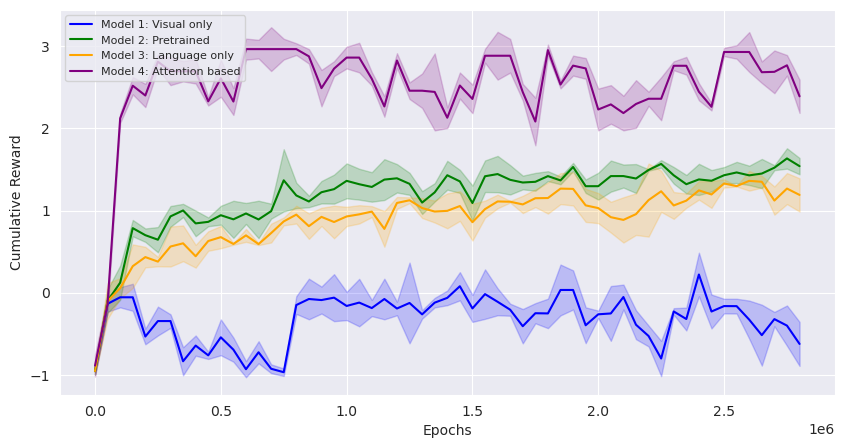

In [12]:
import ast 
import math
import numpy as np
np.random.seed(2018)

prefix = "Train_State/"
mu, sigma = 0, 0.1
plt.figure(figsize=(10,5))
N_MODELS = 4
############## MODEL 0, 1, 2, 3############## 
label_arr = ['Model 1: Visual only', 'Model 2: Pretrained', 'Model 3: Language only', 'Model 4: Attention based']
color_arr = ["blue", "green", "orange", "purple"]
suffix_arr = ["", "_seed1", "_seed2"]
for i in range(N_MODELS): # First three models.
    y, x = [], []
    for j in range(len(suffix_arr)):
        with open(f"{prefix}train_model{i}_d3s.txt{suffix_arr[j]}", "r") as file:
            content = file.read()
            my_list = ast.literal_eval(content)
            n = len(my_list)
            y.append([ my_list[i][1] for i in range(n) ])
            x.append([ my_list[i][0] for i in range(n) ])
    xn, y_mean, y_std = [], [], [] # store mean, std.
    lb, avgMx_mean, avgR_prev = 0, 0, None 
    smooth_factor = 0.5
    y_sz = len(y) # no of seeds.
    while lb < n: 
        avgR_arr = []
        for y_indx in range(y_sz):
            value = y[y_indx][lb]
            avgR_arr.append(value)
        avgR = sum(avgR_arr)/y_sz
        avg_std = math.sqrt(sum([(x-avgR)**2 for x in avgR_arr])/y_sz)
        avgMx_mean = avgR_prev if avgR_prev and avgR_prev - avgR > smooth_factor else avgR
        avgR_prev = avgMx_mean
        xn.append(x[0][lb])
        y_mean.append(avgMx_mean) 
        y_std.append(avg_std)
        lb += 1
    plt.plot(xn, y_mean, linestyle = '-', label = f'{label_arr[i]}', color = f'{color_arr[i]}')
    plt.fill_between(xn, (np.array(y_mean)-np.array(y_std)), \
                         (np.array(y_mean)+np.array(y_std)),\
                         alpha=.2, color = f'{color_arr[i]}')
plt.xlabel('Epochs')
plt.ylabel('Cumulative Reward')
plt.legend(loc = 'upper left', fontsize = 8)
plt.savefig(f'{prefix}TrInstr1.png', dpi = image_resolution)
plt.show()

### State V/S Policy
#### ATTN Model

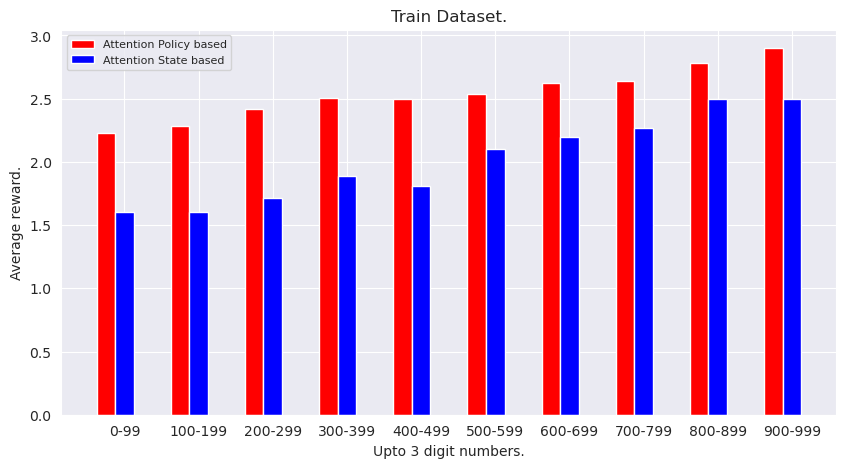

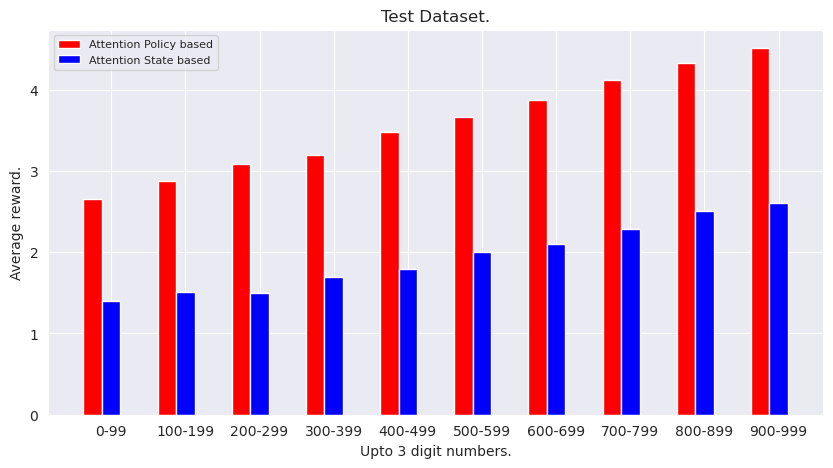

In [13]:
bar_width = 25
prefix = "State_Vs_Policy_NLP/"
''' 
Train.
'''
plt.figure(figsize=(10,5))
x_bin1, ytr1, ytest1 = extract_hist(f"{prefix}console_output_digit3_3", 3, test_type="[FULLTEST]")
ytr1_ = [x if idx < 4 else 0 for idx, x in enumerate(ytr1)]
plt.bar(np.array(x_bin1), ytr1, bar_width, color="red", label = "Attention Policy based")
x_bin2, ytr2, ytest2 = extract_hist(f"{prefix}console_output_digit3_3_sr", 3, test_type="[FULLTEST]")
ytr2_ = [x if idx < 4 else 0 for idx, x in enumerate(ytr2)]
plt.bar(np.array(x_bin2) + bar_width, ytr2, bar_width, color="blue", label = "Attention State based")
plt.xticks(np.array(x_bin1) + bar_width , ("0-99", "100-199", "200-299", "300-399", "400-499", "500-599",
                                               "600-699", "700-799", "800-899", "900-999"))

plt.legend(fontsize=8)
plt.xlabel("Upto 3 digit numbers.")
plt.ylabel("Average reward.")
plt.title("Train Dataset.")
plt.savefig(f'{prefix}3D_DiffPolicyTrain.png', dpi = image_resolution)
plt.show()

''' 
Test.
'''
plt.figure(figsize=(10,5))
plt.bar(np.array(x_bin1), ytest1, bar_width, color="red", label = "Attention Policy based")
plt.bar(np.array(x_bin2) + bar_width, ytest2, bar_width, color="blue", label = "Attention State based")
plt.xticks(np.array(x_bin1) + bar_width , ("0-99", "100-199", "200-299", "300-399", "400-499", "500-599",
                                          "600-699", "700-799", "800-899", "900-999"))
plt.legend(fontsize=8)
plt.xlabel("Upto 3 digit numbers.")
plt.ylabel("Average reward.")
plt.title("Test Dataset.")
plt.savefig(f'{prefix}3D_DiffPolicyTest.png', dpi = image_resolution)
plt.show()

### Curiculum Learning
#### Attn Model.

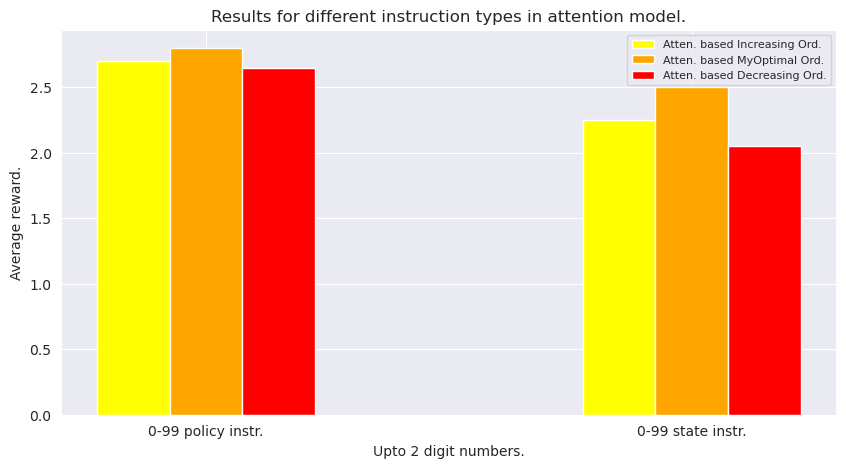

In [14]:
prefix = "CL/"
bar_width = 1.5
plt.figure(figsize=(10,5))
x_bin1, y1 = [0, 10], [2.7, 2.25]
plt.bar(np.array(x_bin1), y1, bar_width, color="yellow", label = "Atten. based Increasing Ord.")

x_bin2, y2 = [0, 10], [2.8, 2.5]
plt.bar(np.array(x_bin2) + bar_width, y2, bar_width, color="orange", label = "Atten. based MyOptimal Ord.")

x_bin3, y3 = [0, 10], [2.65, 2.05]
plt.bar(np.array(x_bin3) + 2*bar_width, y3, bar_width, color="red", label = "Atten. based Decreasing Ord.")
plt.xticks(np.array(x_bin3) + bar_width, ("0-99 policy instr.", "0-99 state instr."))

plt.legend(fontsize=8)
plt.xlabel("Upto 2 digit numbers.")
plt.ylabel("Average reward.")
plt.title("Results for different instruction types in attention model.")
plt.savefig(f'{prefix}2D_CL_Tr.png', dpi = image_resolution)
plt.show()